In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [2]:
data_frame_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
data_frame_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
data_frame_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
melted_result_confirmed = pd.melt(
    data_frame_confirmed, 
    id_vars=[
        'Province/State', 
        'Country/Region', 
        'Lat', 
        'Long'
    ], 
    var_name='Date', 
    value_name='Confirmed'
)
melted_result_deaths = pd.melt(data_frame_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
melted_result_recovered = pd.melt(data_frame_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')

melted_result_confirmed['Date'] = pd.to_datetime(melted_result_confirmed['Date']).dt.date
melted_result_deaths['Date'] = pd.to_datetime(melted_result_deaths['Date']).dt.date
melted_result_recovered['Date'] = pd.to_datetime(melted_result_recovered['Date']).dt.date

melted_result_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0
...,...,...,...,...,...,...
25755,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-17,1
25756,Reunion,France,-21.1351,55.2471,2020-03-17,9
25757,NaN,Barbados,13.1939,-59.5432,2020-03-17,2
25758,NaN,Montenegro,42.5000,19.3000,2020-03-17,2


In [4]:
def get_from_day_0(country, days):
    counter_aux = 0
    for key, value in country.iterrows():
        if value['Confirmed'] != 0:
            country.at[key, "Days"] = counter_aux
            counter_aux = counter_aux + 1
            
    country = country[(country["Days"] >= 0)]
    
    if days != 0:
        country = country[:days]
    
    return country

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def make_the_day_0_plot(country_1, country_2):
    ax = pp.gca()
    country_1.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_1['Country/Region'].iloc[0], ax=ax)
    country_2.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_2['Country/Region'].iloc[0], ax=ax)
    pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

In [6]:
# Turn melted_result_confirmed back into pivot table summing up all cases.
# This is needed since the WHO was capturing state/provincial data at beginning but has
# since ceased such level of detail.
melted_result_confirmed = pd.pivot_table(
    melted_result_confirmed, 
    index = [
        'Country/Region',
        'Date',
    ],
    values = [
        'Confirmed'
    ],
    aggfunc = 'sum'
)
melted_result_confirmed

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Vietnam        2020-03-13         47
               2020-03-14         53
               2020-03-15         56
               2020-03-16         61
               2020-03-17         66

[8512 rows x 1 columns]

In [11]:
melted_result_confirmed["Days"] = -1
melted_result_confirmed = melted_result_confirmed.sort_values(['Country/Region', 'Date'])

name_of_country_1 = "Mexico"
name_of_country_2 = "Argentina"
#name_of_country_1 = "Argentina"
#name_of_country_2 = "Spain"
# Put 0 if you don't want any limit
days_from_day_0 = 14

country_1 = get_from_day_0( 
    melted_result_confirmed.xs( (name_of_country_1) ), 
    days_from_day_0
)# Get cross section of pivot table before calculating 'Days' value.

country_2 = get_from_day_0( 
    melted_result_confirmed.xs( (name_of_country_2) ), 
    days_from_day_0
)# Get cross section of pivot table before calculating 'Days' value.

In [12]:
country_1['Country/Region'] = name_of_country_1
country_1

,Confirmed,Days,Country/Region
Date,,,
2020-02-28,1,0,Mexico
2020-02-29,4,1,Mexico
2020-03-01,5,2,Mexico
2020-03-02,5,3,Mexico
2020-03-03,5,4,Mexico
2020-03-04,5,5,Mexico
2020-03-05,5,6,Mexico
2020-03-06,6,7,Mexico
2020-03-07,6,8,Mexico


In [13]:
country_2['Country/Region'] = name_of_country_2
country_2

,Confirmed,Days,Country/Region
Date,,,
2020-03-03,1,0,Argentina
2020-03-04,1,1,Argentina
2020-03-05,1,2,Argentina
2020-03-06,2,3,Argentina
2020-03-07,8,4,Argentina
2020-03-08,12,5,Argentina
2020-03-09,12,6,Argentina
2020-03-10,17,7,Argentina
2020-03-11,19,8,Argentina


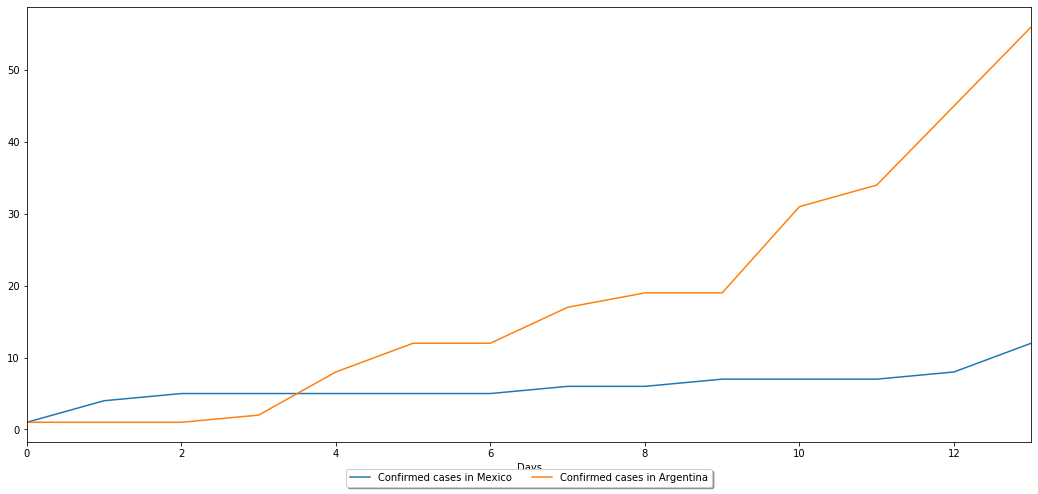

In [14]:
pp.figure(figsize = (18, 8))
make_the_day_0_plot(country_1, country_2)